In [73]:
!pip install scikit-learn kmodes seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.2 MB/s eta 0:00:00a 0:00:01


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

k_df = pd.read_csv("../data/citizen_states_cleaned/maharashtra.csv")
k_df = k_df[k_df["Species_name"] == "Peepal-Ficus religiosa"]

species = {}
_id = 0

for specie in k_df["Species_name"].unique():
    if specie not in species:
        species[specie] = _id
        species[_id] = specie
        _id += 1

k_df = k_df.drop(["Date_of_observation", "Observation_ID", "User_id", "User_Tree_id", "Lat", "Long"], axis=1)

kp = KPrototypes(n_clusters=20, init='Huang', n_init=10, verbose=1)

k_df_withoutNaN = k_df.dropna()
#rows_with_nan = k_df_withoutNaN[k_df_withoutNaN.isna().any(axis=1)]

clusters = kp.fit_predict(k_df_withoutNaN, categorical=[0])
k_df_withoutNaN['Cluster'] = clusters

centroids = kp.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 144, ncost: 3859.506061393295
Run: 1, iteration: 2/100, moves: 37, ncost: 3743.070235036075
Run: 1, iteration: 3/100, moves: 16, ncost: 3677.3231810250218
Run: 1, iteration: 4/100, moves: 1, ncost: 3675.80410714511
Run: 1, iteration: 5/100, moves: 0, ncost: 3675.80410714511
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initial

/var/folders/wp/hkc1k68n5qd_5p4xhh28tb480000gn/T/ipykernel_34239/4228850830.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df_withoutNaN['Cluster'] = clusters


In [1]:
# PCA and Visualization

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(k_df_withoutNaN[["Species_name"]])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Species_name']))

k_df_encoded = pd.concat([k_df_withoutNaN[['Leaves_fresh', 'Leaves_mature', 'Leaves_old',
       'Flowers_bud', 'Flowers_open', 'Flowers_male', 'Flowers_Female',
       'Fruits_unripe', 'Fruits_ripe', 'Fruits_open', 'Year', 'Week', 'Cluster']].reset_index(drop=True), encoded_df], axis=1)

distances = []

for i, row in k_df_encoded.iterrows():
    cluster_label = clusters[i]
    centroid = centroids[0]
    relevant_values = row.values[:len(row.values)-2]
    float_centroid = [float(val) for val in centroid[:len(centroid)-1]]
    distance = np.linalg.norm(relevant_values - float_centroid)
    distances.append(distance)

k_df_encoded['Distance_to_Centroid'] = distances

std_dev_dist = k_df_encoded['Distance_to_Centroid'].std()
mean = np.mean(k_df_encoded["Distance_to_Centroid"])
var = k_df_encoded["Distance_to_Centroid"].var()

print("Standard deviation of distance: ", std_dev_dist)
print("Mean: ", mean)
print("Variance: ", var)

display(k_df_encoded)
pd.set_option("display.max_columns", 100000)

filtered_df = k_df_encoded[ (k_df_encoded['Distance_to_Centroid'] >= mean - std_dev_dist) & (k_df_encoded['Distance_to_Centroid'] <= mean + std_dev_dist)]

#print(len(filtered_df))
#print(len(k_df_encoded))


pca = PCA(n_components=2)
components = pca.fit_transform(k_df_encoded)

pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Plot showing clusters after PCA')
plt.show()

NameError: name 'k_df_withoutNaN' is not defined

In [70]:
k_df_withoutNaN.columns

Index(['Species_name', 'Leaves_fresh', 'Leaves_mature', 'Leaves_old',
       'Flowers_bud', 'Flowers_open', 'Flowers_male', 'Flowers_Female',
       'Fruits_unripe', 'Fruits_ripe', 'Fruits_open', 'Year', 'Week', 'Lat',
       'Long', 'Cluster'],
      dtype='object')

In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import pandas as pd

In [5]:
minority_downsampled_df = resample(minority_df, replace=True, n_samples=30, random_state=42)
downsampled_df = pd.concat([majority_df, minority_downsampled_df])

y = downsampled_df["benign"]
X = downsampled_df.drop("benign", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = IsolationForest(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred[y_pred == -1] = 0

print(confusion_matrix(y_test, y_pred))

[[ 7  2]
 [ 5 83]]


In [52]:
k_df_encoded.drop(["Species_name_Peepal-Ficus religiosa", "Distance_to_Centroid"])

KeyError: "['Species_name_Peepal-Ficus religiosa', 'Distance_to_Centroid'] not found in axis"

21


/Users/shivansh/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


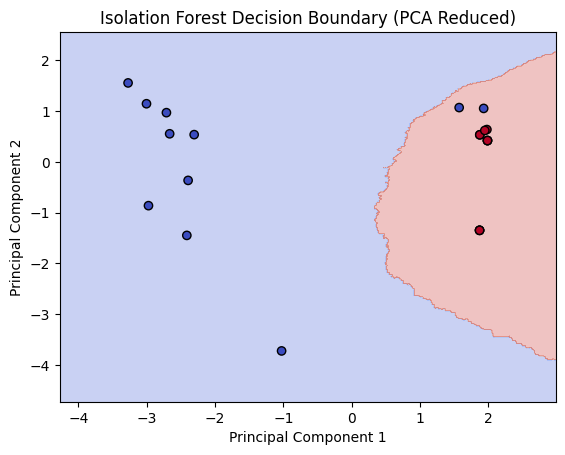

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np

k_df = pd.read_csv("../data/citizen_states_cleaned/maharashtra.csv")
k_df = k_df[k_df["Species_name"] == "Peepal-Ficus religiosa"]

k_df = k_df.drop(["Date_of_observation", "Observation_ID", "User_id", "User_Tree_id", "Lat", "Long"], axis=1)
k_df_withoutNaN = k_df.dropna()

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(k_df_withoutNaN[["Species_name"]])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Species_name']))

k_df_encoded = pd.concat([k_df_withoutNaN[['Leaves_fresh', 'Leaves_mature', 'Leaves_old',
       'Flowers_bud', 'Flowers_open', 'Flowers_male', 'Flowers_Female',
       'Fruits_unripe', 'Fruits_ripe', 'Fruits_open', 'Year', 'Week']].reset_index(drop=True), encoded_df], axis=1)

k_df_encoded = k_df_encoded.drop("Species_name_Peepal-Ficus religiosa", axis=1)
k_df_encoded = k_df_encoded[k_df_encoded["Week"] == 1]
print(len(k_df_encoded))

model = IsolationForest(n_estimators = 500, verbose = 1, random_state = 42)

model.fit(k_df_encoded)
preds = model.predict(k_df_encoded)

#k_df_encoded["predictions"] = preds

#print(len(k_df_encoded[k_df_encoded["predictions"] == 1]))

pca = PCA(n_components=2)
components = pca.fit_transform(k_df_encoded)

#pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])

xx, yy = np.meshgrid(np.linspace(components[:, 0].min() - 1, components[:, 0].max() + 1, 500),
                     np.linspace(components[:, 1].min() - 1, components[:, 1].max() + 1, 500))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_original_space = pca.inverse_transform(grid_points)

Z = model.predict(grid_points_original_space)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(components[:, 0], components[:, 1], c=preds, cmap='coolwarm', edgecolors='k')
plt.title('Isolation Forest Decision Boundary (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()